**MILESTONE 2**

**FEATURE ENGINEERING**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv("/kaggle/input/feature/Energy_consumption.csv")


In [4]:
print(df.shape)
print(df.info())
print(df.head())


(1000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB
None
             Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0  2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1  2022-01-01 01:00:00    27.731651  54

SEPARATE FEATURES & TARGET

In [5]:
X = df.drop('EnergyConsumption', axis=1)
y = df['EnergyConsumption']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1000, 10)
Target shape: (1000,)


Separate numeric and categorical columns

In [6]:

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include='object').columns

print("Numeric columns:", list(num_cols))
print("Categorical columns:", list(cat_cols))


Numeric columns: ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'RenewableEnergy']
Categorical columns: ['Timestamp', 'HVACUsage', 'LightingUsage', 'DayOfWeek', 'Holiday']


Handle Missing Values

In [7]:

X[num_cols] = X[num_cols].fillna(X[num_cols].median())


X[cat_cols] = X[cat_cols].fillna(X[cat_cols].mode().iloc[0])

print("Missing values after handling:", X.isnull().sum().sum())


Missing values after handling: 0


Convert On/Off → 1/0                                                                                          Binary Encoding (Label Encoding for binary categorical variables).

In [8]:
for col in cat_cols:
    if set(X[col].unique()) <= {'On', 'Off'}:
        X[col] = X[col].map({'Off': 0, 'On': 1})

print(X.head())


             Timestamp  Temperature   Humidity  SquareFootage  Occupancy  \
0  2022-01-01 00:00:00    25.139433  43.431581    1565.693999          5   
1  2022-01-01 01:00:00    27.731651  54.225919    1411.064918          1   
2  2022-01-01 02:00:00    28.704277  58.907658    1755.715009          2   
3  2022-01-01 03:00:00    20.080469  50.371637    1452.316318          1   
4  2022-01-01 04:00:00    23.097359  51.401421    1094.130359          9   

   HVACUsage  LightingUsage  RenewableEnergy  DayOfWeek Holiday  
0          1              0         2.774699     Monday      No  
1          1              1        21.831384   Saturday      No  
2          0              0         6.764672     Sunday      No  
3          0              1         8.623447  Wednesday      No  
4          1              0         3.071969     Friday      No  


Term	Meaning
Time Series Sorting

In [9]:
df = df.sort_index()
print("Data sorted by timestamp index")
print("First index:", df.index.min())
print("Last index:", df.index.max())


Data sorted by timestamp index
First index: 0
Last index: 999


In [10]:
print("Duplicate timestamps:", df.index.duplicated().sum())
df = df[~df.index.duplicated()]


Duplicate timestamps: 0


In [11]:
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Timestamp            0
Temperature          0
Humidity             0
SquareFootage        0
Occupancy            0
HVACUsage            0
LightingUsage        0
RenewableEnergy      0
DayOfWeek            0
Holiday              0
EnergyConsumption    0
dtype: int64


CHECK IF TIMESTAMP COLUMN EXISTS

In [12]:
print(df.columns)


Index(['Timestamp', 'Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
       'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')


CONVERT TIMESTAMP COLUMN TO DATETIME

In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
print(df['Timestamp'].dtype)


datetime64[ns]


SET IT AS INDEX

In [14]:
df = df.set_index('Timestamp')
print(type(df.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [15]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['is_weekend'] = (df.index.dayofweek >= 5).astype(int)

print(df[['year', 'month', 'day', 'dayofweek', 'is_weekend']].head())


                     year  month  day  dayofweek  is_weekend
Timestamp                                                   
2022-01-01 00:00:00  2022      1    1          5           1
2022-01-01 01:00:00  2022      1    1          5           1
2022-01-01 02:00:00  2022      1    1          5           1
2022-01-01 03:00:00  2022      1    1          5           1
2022-01-01 04:00:00  2022      1    1          5           1


In [16]:
df['Energy_lag_1'] = df['EnergyConsumption'].shift(1)
df['Energy_lag_7'] = df['EnergyConsumption'].shift(7)

print(df[['EnergyConsumption', 'Energy_lag_1', 'Energy_lag_7']].head(10))


                     EnergyConsumption  Energy_lag_1  Energy_lag_7
Timestamp                                                         
2022-01-01 00:00:00          75.364373           NaN           NaN
2022-01-01 01:00:00          83.401855     75.364373           NaN
2022-01-01 02:00:00          78.270888     83.401855           NaN
2022-01-01 03:00:00          56.519850     78.270888           NaN
2022-01-01 04:00:00          70.811732     56.519850           NaN
2022-01-01 05:00:00          84.321885     70.811732           NaN
2022-01-01 06:00:00          76.165791     84.321885           NaN
2022-01-01 07:00:00          74.131906     76.165791     75.364373
2022-01-01 08:00:00          78.206236     74.131906     83.401855
2022-01-01 09:00:00          77.992214     78.206236     78.270888


In [17]:
df['Energy_roll_mean_7'] = df['EnergyConsumption'].rolling(7).mean()
df['Energy_roll_std_7'] = df['EnergyConsumption'].rolling(7).std()

print(df[['Energy_roll_mean_7', 'Energy_roll_std_7']].head(10))


                     Energy_roll_mean_7  Energy_roll_std_7
Timestamp                                                 
2022-01-01 00:00:00                 NaN                NaN
2022-01-01 01:00:00                 NaN                NaN
2022-01-01 02:00:00                 NaN                NaN
2022-01-01 03:00:00                 NaN                NaN
2022-01-01 04:00:00                 NaN                NaN
2022-01-01 05:00:00                 NaN                NaN
2022-01-01 06:00:00           74.979482           9.387348
2022-01-01 07:00:00           74.803415           9.390483
2022-01-01 08:00:00           74.061184           8.783287
2022-01-01 09:00:00           74.021374           8.761631


In [18]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower, upper)

print("Outliers capped using IQR")


Outliers capped using IQR


In [19]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("After encoding shape:", df.shape)


After encoding shape: (1000, 24)


In [20]:
before = df.shape[0]
df = df.dropna()
after = df.shape[0]

print(f"Rows removed due to lag features: {before - after}")
print("Final shape:", df.shape)


Rows removed due to lag features: 7
Final shape: (993, 24)


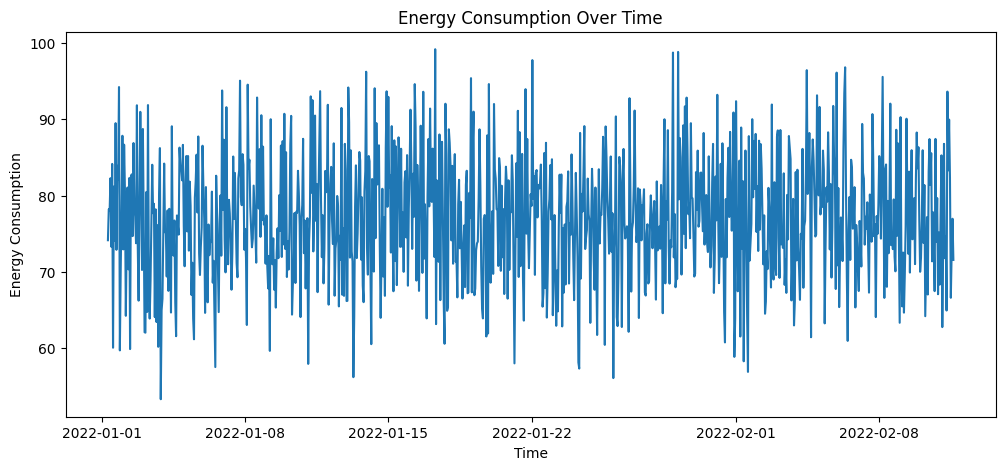

In [21]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['EnergyConsumption'])
plt.title("Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Energy Consumption")
plt.show()


**BASELINE MODEL — LINEAR REGRESSION IMPLEMENTATION**

Step 1 — Prepare X and y (Using feature-engineered dataset)

In [22]:
import pandas as pd
import numpy as np

# List of possible dataframe names from your notebooks
possible_df_names = ["df_final", "df_fe", "final_df", "df_processed", "energy_df", "df", "data"]

df_model_source = None

# Check which dataframe exists in memory
for name in possible_df_names:
    if name in globals():
        df_model_source = globals()[name]
        print(f"✔ Using dataframe → {name}")
        break

if df_model_source is None:
    raise ValueError("❌ ERROR: No dataframe found. Please verify your variable names.")

# Drop NA values caused by lag/moving average features
df_model = df_model_source.dropna()

# Automatically detect the target column
target_col = None
for col in df_model.columns:
    if "energy" in col.lower() or "consumption" in col.lower():
        target_col = col
        break

if target_col is None:
    raise ValueError("❌ ERROR: No target column found. Please ensure it contains 'energy' or 'consumption'.")

print(f"✔ Target column detected → {target_col}")

# Prepare X and y
X = df_model.drop(columns=[target_col])
y = df_model[target_col]


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # IMPORTANT: Do NOT shuffle time series
)

print("✔ Train-test split completed")
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))



✔ Using dataframe → df
✔ Target column detected → RenewableEnergy
✔ Train-test split completed
Training samples: 794
Testing samples: 199


Step 2 — Train Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

Step 3 — Predict on Test Set

In [24]:
y_pred_lr = lr_model.predict(X_test)


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("📌 Linear Regression Baseline Results")
print("MAE  :", round(mae_lr, 3))
print("RMSE :", round(rmse_lr, 3))


📌 Linear Regression Baseline Results
MAE  : 7.539
RMSE : 8.757


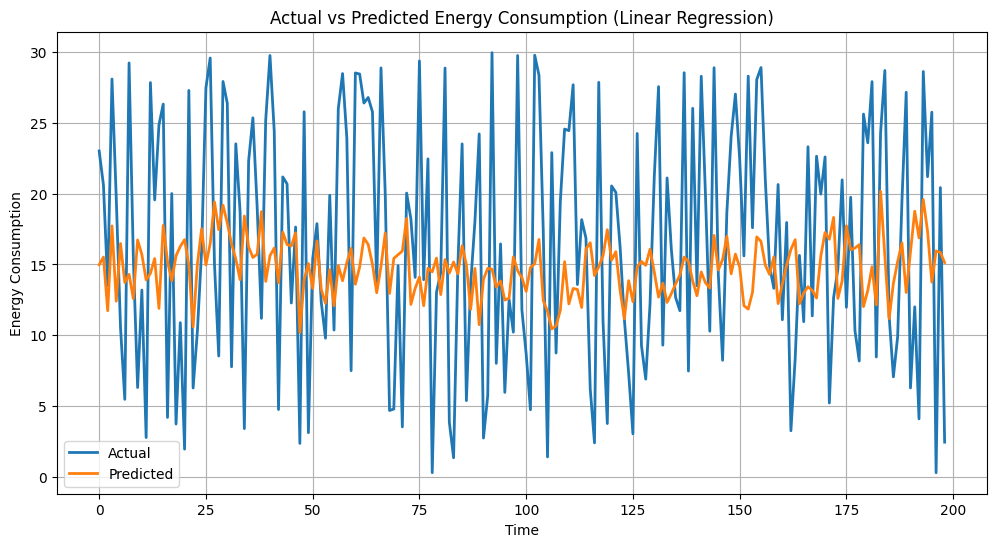

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", linewidth=2)
plt.plot(y_pred_lr, label="Predicted", linewidth=2)
plt.title("Actual vs Predicted Energy Consumption (Linear Regression)")
plt.xlabel("Time")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(True)
plt.show()


**MILESTONE 3**

**LSTM MODEL DEVELOPMENT**

STEP 1 — Import Required Libraries

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


2026-01-15 09:13:53.755274: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768468434.260346      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768468434.412643      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768468435.615948      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768468435.615988      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768468435.615991      55 computation_placer.cc:177] computation placer alr

STEP 2 — Detect DataFrame & Target Column Automatically

In [28]:
possible_df_names = ["df_final", "df_fe", "final_df", "df_processed", "energy_df", "df", "data"]

df_model_source = None
for name in possible_df_names:
    if name in globals():
        df_model_source = globals()[name]
        print(f"✔ Using dataframe → {name}")
        break

if df_model_source is None:
    raise ValueError("❌ ERROR: No dataframe found.")

df_lstm = df_model_source.dropna()

# 2. Detect target column
target_col = None
for col in df_lstm.columns:
    if "energy" in col.lower() or "consumption" in col.lower():
        target_col = col
        break

print("✔ Target column:", target_col)

feature_cols = df_lstm.columns.tolist()
feature_cols.remove(target_col)

X_raw = df_lstm[feature_cols].values
y_raw = df_lstm[[target_col]].values

print(f"Features shape: {X_raw.shape}")
print(f"Target shape: {y_raw.shape}")


✔ Using dataframe → df
✔ Target column: RenewableEnergy
Features shape: (993, 23)
Target shape: (993, 1)


In [29]:
#CRITICAL: Split BEFORE scaling to prevent data leakage
split_idx = int(len(X_raw) * 0.8)

X_train_raw = X_raw[:split_idx]
X_test_raw = X_raw[split_idx:]
y_train_raw = y_raw[:split_idx]
y_test_raw = y_raw[split_idx:]

print(f"\n✔ Train-test split completed")
print(f"Training samples: {len(X_train_raw)}")
print(f"Testing samples: {len(X_test_raw)}")


✔ Train-test split completed
Training samples: 794
Testing samples: 199


STEP 3 — Scale Data (LSTM performs better on scaled data.)

In [30]:

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform training data
X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)

# Only transform test data (NO FITTING!)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

print(f"\n✔ Data scaled")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


✔ Data scaled
X_train_scaled shape: (794, 23)
X_test_scaled shape: (199, 23)


STEP 4 — Create Sequences (Time-Steps)

In [31]:
def create_sequences(X, y, timesteps=10):
    """
    Create sequences for LSTM
    
    Args:
        X: Feature array (samples, features)
        y: Target array (samples, 1)
        timesteps: Number of time steps to look back
        
    Returns:
        X_seq: (samples - timesteps, timesteps, features)
        y_seq: (samples - timesteps, 1)
    """
    X_seq, y_seq = [], []
    
    for i in range(timesteps, len(X)):
        # Take last 'timesteps' rows for features
        X_seq.append(X[i-timesteps:i])
        # Take current row for target
        y_seq.append(y[i])
    
    return np.array(X_seq), np.array(y_seq)

# Use smaller timesteps (10 instead of 60) for better results
timesteps = 10

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, timesteps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, timesteps)

print(f"\n✔ Sequences created")
print(f"X_train_seq shape: {X_train_seq.shape}")  # (samples, timesteps, features)
print(f"y_train_seq shape: {y_train_seq.shape}")  # (samples, 1)
print(f"X_test_seq shape: {X_test_seq.shape}")
print(f"y_test_seq shape: {y_test_seq.shape}")


✔ Sequences created
X_train_seq shape: (784, 10, 23)
y_train_seq shape: (784, 1)
X_test_seq shape: (189, 10, 23)
y_test_seq shape: (189, 1)


STEP 7 — Build LSTM Model Architecture

In [33]:
n_features = X_train_seq.shape[2]  # Number of features

# Simpler model to reduce overfitting
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(timesteps, n_features)),
    Dropout(0.3),
    
    LSTM(32, return_sequences=False),
    Dropout(0.3),
    
    Dense(16, activation='relu'),
    Dense(1)
])

# Use lower learning rate for stability
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10, 64)         │        22,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,489 (138.63 KB)

 Trainable params: 35,489 (138.63 KB)

 Non-trainable params: 0 (0.00 B)

STEP 8 — Train the LSTM Model

In [34]:
import tensorflow as tf
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    verbose=1,
    callbacks=[
        # Stop if no improvement
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True
        )
    ]
)


Epoch 1/100


I0000 00:00:1768468520.402626     144 cuda_dnn.cc:529] Loaded cuDNN version 91002


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1524 - mae: 0.3171 - val_loss: 0.1028 - val_mae: 0.2883
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0964 - mae: 0.2625 - val_loss: 0.1062 - val_mae: 0.2923
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0911 - mae: 0.2552 - val_loss: 0.1008 - val_mae: 0.2826
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0894 - mae: 0.2551 - val_loss: 0.0992 - val_mae: 0.2816
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0853 - mae: 0.2476 - val_loss: 0.1000 - val_mae: 0.2842
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0898 - mae: 0.2593 - val_loss: 0.0994 - val_mae: 0.2815
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0897 - mae: 0.2545 - val_loss: 0.1001 - val_mae: 0.2837
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0877 - mae: 0.2508 - val_loss: 0.1029 - val_mae: 0.2837
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0978 - mae: 0

In [35]:

y_pred_scaled = model.predict(X_test_seq)

# Inverse transform to get original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_original = scaler_y.inverse_transform(y_test_seq)

print(f"\n✔ Predictions generated")
print(f"y_pred shape: {y_pred.shape}")
print(f"y_test_original shape: {y_test_original.shape}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

✔ Predictions generated
y_pred shape: (189, 1)
y_test_original shape: (189, 1)


**MODEL EVALUATION & INTEGRATION**

STEP 1 — Calculate MAE, RMSE, R² for LSTM

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_lstm = mean_absolute_error(y_test_original, y_pred)
rmse_lstm = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2_lstm = r2_score(y_test_original, y_pred)

print("📌 LSTM Model Performance")
print("----------------------------")
print(f"MAE  : {mae_lstm:.4f}")
print(f"RMSE : {rmse_lstm:.4f}")
print(f"R²   : {r2_lstm:.4f}")


📌 LSTM Model Performance
----------------------------
MAE  : 7.4594
RMSE : 8.6247
R²   : -0.0185


STEP 2 — Compare LSTM vs Linear Regression

In [37]:
print("📊 Model Comparison Summary")
print("------------------------------")
print(f"Linear Regression MAE  : {mae_lr:.4f}")
print(f"Linear Regression RMSE : {rmse_lr:.4f}\n")

print(f"LSTM MAE               : {mae_lstm:.4f}")
print(f"LSTM RMSE              : {rmse_lstm:.4f}")
print(f"LSTM R²                : {r2_lstm:.4f}")


📊 Model Comparison Summary
------------------------------
Linear Regression MAE  : 7.5392
Linear Regression RMSE : 8.7571

LSTM MAE               : 7.4594
LSTM RMSE              : 8.6247
LSTM R²                : -0.0185


STEP 3 — Plot Actual vs Predicted (LSTM)

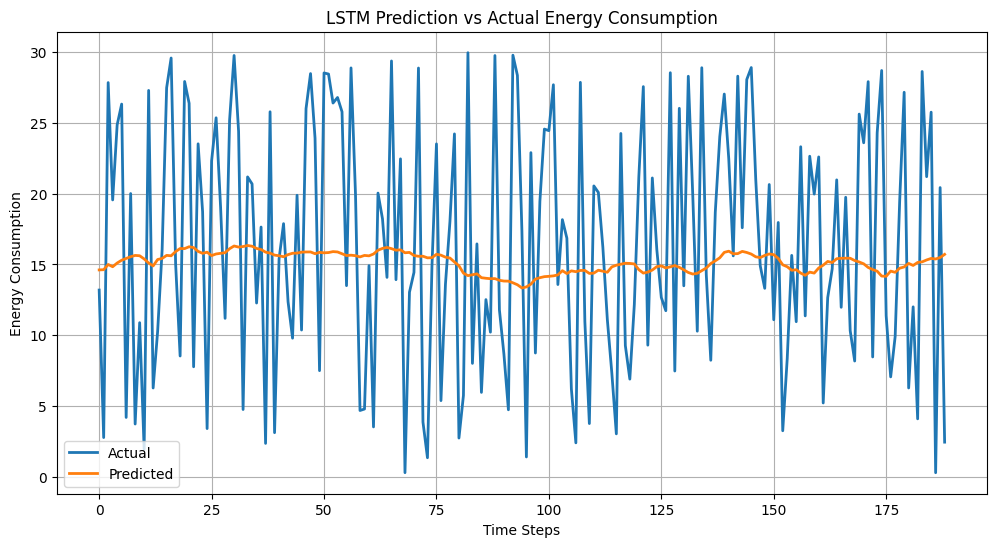

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label="Actual", linewidth=2)
plt.plot(y_pred, label="Predicted", linewidth=2)
plt.title("LSTM Prediction vs Actual Energy Consumption")
plt.xlabel("Time Steps")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(True)
plt.show()


STEP 4 — Save LSTM Model for Deployment

In [39]:
model.save("lstm_energy_model.h5")
print("✔ Model saved as lstm_energy_model.h5")


✔ Model saved as lstm_energy_model.h5
